In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:

%pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.read_csv("C:/Users/HP/Desktop/ECHOhealth/data/healthy_vs_laryngeal_disorder_classification.csv")

# Data Understanding

In [7]:
df.head()

,idx,Jitter,Shimmer,GNE,Irregularity,Noise,OverallSeverity,mean_F0,SD_F0,Max_F0,Min_F0,Diagnosis
0,1,0.09,7.41,0.83,0.88,0.37,0.77,188.48,0.36,189.39,186.57,healthy
1,2,0.07,8.35,0.78,0.85,0.45,0.76,125.05,0.14,125.31,124.69,healthy
2,3,0.15,11.58,0.44,1.18,1.04,1.09,214.37,0.40,215.52,212.77,healthy
3,4,0.39,7.70,0.35,1.17,1.54,1.14,303.73,0.52,306.75,303.03,healthy
4,5,0.43,9.69,0.51,1.04,0.89,0.96,165.92,6.97,173.61,85.62,healthy


In [8]:
df.shape

(131, 12)

The dataset is relatively simple with 131 observations against 12 columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   idx              131 non-null    int64  
 1   Jitter           131 non-null    float64
 2   Shimmer          131 non-null    float64
 3   GNE              131 non-null    float64
 4   Irregularity     131 non-null    float64
 5   Noise            131 non-null    float64
 6   OverallSeverity  131 non-null    float64
 7   mean_F0          131 non-null    float64
 8   SD_F0            131 non-null    float64
 9   Max_F0           131 non-null    float64
 10  Min_F0           131 non-null    float64
 11  Diagnosis        131 non-null    object 
dtypes: float64(10), int64(1), object(1)
memory usage: 12.4+ KB


This dataset is devoid of categorical features and our analysis is entirely dependent on the numerical features.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
idx,131.0,66.000000,37.960506,1.00,33.500,66.00,98.500,131.00
Jitter,131.0,1.961450,4.805058,0.03,0.160,0.31,1.700,31.58
Shimmer,131.0,13.820687,9.608891,2.70,8.265,11.06,16.320,62.42
GNE,131.0,0.590458,0.218107,0.15,0.405,0.61,0.780,0.96
Irregularity,131.0,1.340153,0.500294,0.50,0.980,1.16,1.670,2.79
Noise,131.0,0.922366,0.613509,0.16,0.455,0.73,1.255,2.66
OverallSeverity,131.0,1.206260,0.464532,0.47,0.875,1.02,1.485,2.60
mean_F0,131.0,204.198092,58.551715,71.72,160.205,199.32,244.125,333.33
SD_F0,131.0,5.388168,9.553036,-1.00,0.520,0.97,2.700,48.81
Max_F0,131.0,217.932061,60.203629,72.05,177.635,215.52,260.420,333.33


# Exploratory Data Analysis

In [11]:
df.drop('idx', axis=1, inplace=True)

df.head()

,Jitter,Shimmer,GNE,Irregularity,Noise,OverallSeverity,mean_F0,SD_F0,Max_F0,Min_F0,Diagnosis
0,0.09,7.41,0.83,0.88,0.37,0.77,188.48,0.36,189.39,186.57,healthy
1,0.07,8.35,0.78,0.85,0.45,0.76,125.05,0.14,125.31,124.69,healthy
2,0.15,11.58,0.44,1.18,1.04,1.09,214.37,0.40,215.52,212.77,healthy
3,0.39,7.70,0.35,1.17,1.54,1.14,303.73,0.52,306.75,303.03,healthy
4,0.43,9.69,0.51,1.04,0.89,0.96,165.92,6.97,173.61,85.62,healthy


**idx** doesn't serve any purpose in our analysis so we drop this column

In [12]:
df.isna().sum()

Jitter             0
Shimmer            0
GNE                0
Irregularity       0
Noise              0
OverallSeverity    0
mean_F0            0
SD_F0              0
Max_F0             0
Min_F0             0
Diagnosis          0
dtype: int64

Fortunately, there are no missing values in the dataset

## Data Visualization

#### 1. Distribution of Target Label, i.e, Diagnosis

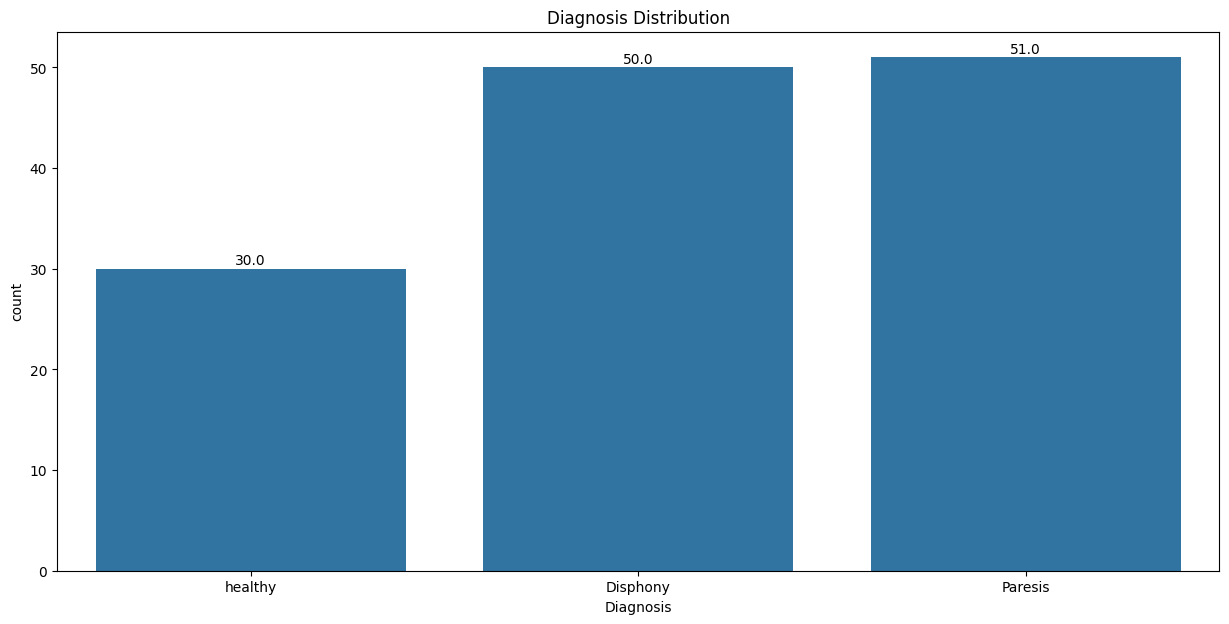

In [13]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(df, x='Diagnosis');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height()+0.1, rect.get_height(), ha='center', va='bottom')
plt.title('Diagnosis Distribution');


* **Disphony Diagnosis and Paresis** are distributed equally but the patients who are diagnosed **healthy** are less compared to other classes.

#### 2. Distribution of Numeric Features w.r.t Diagnosis

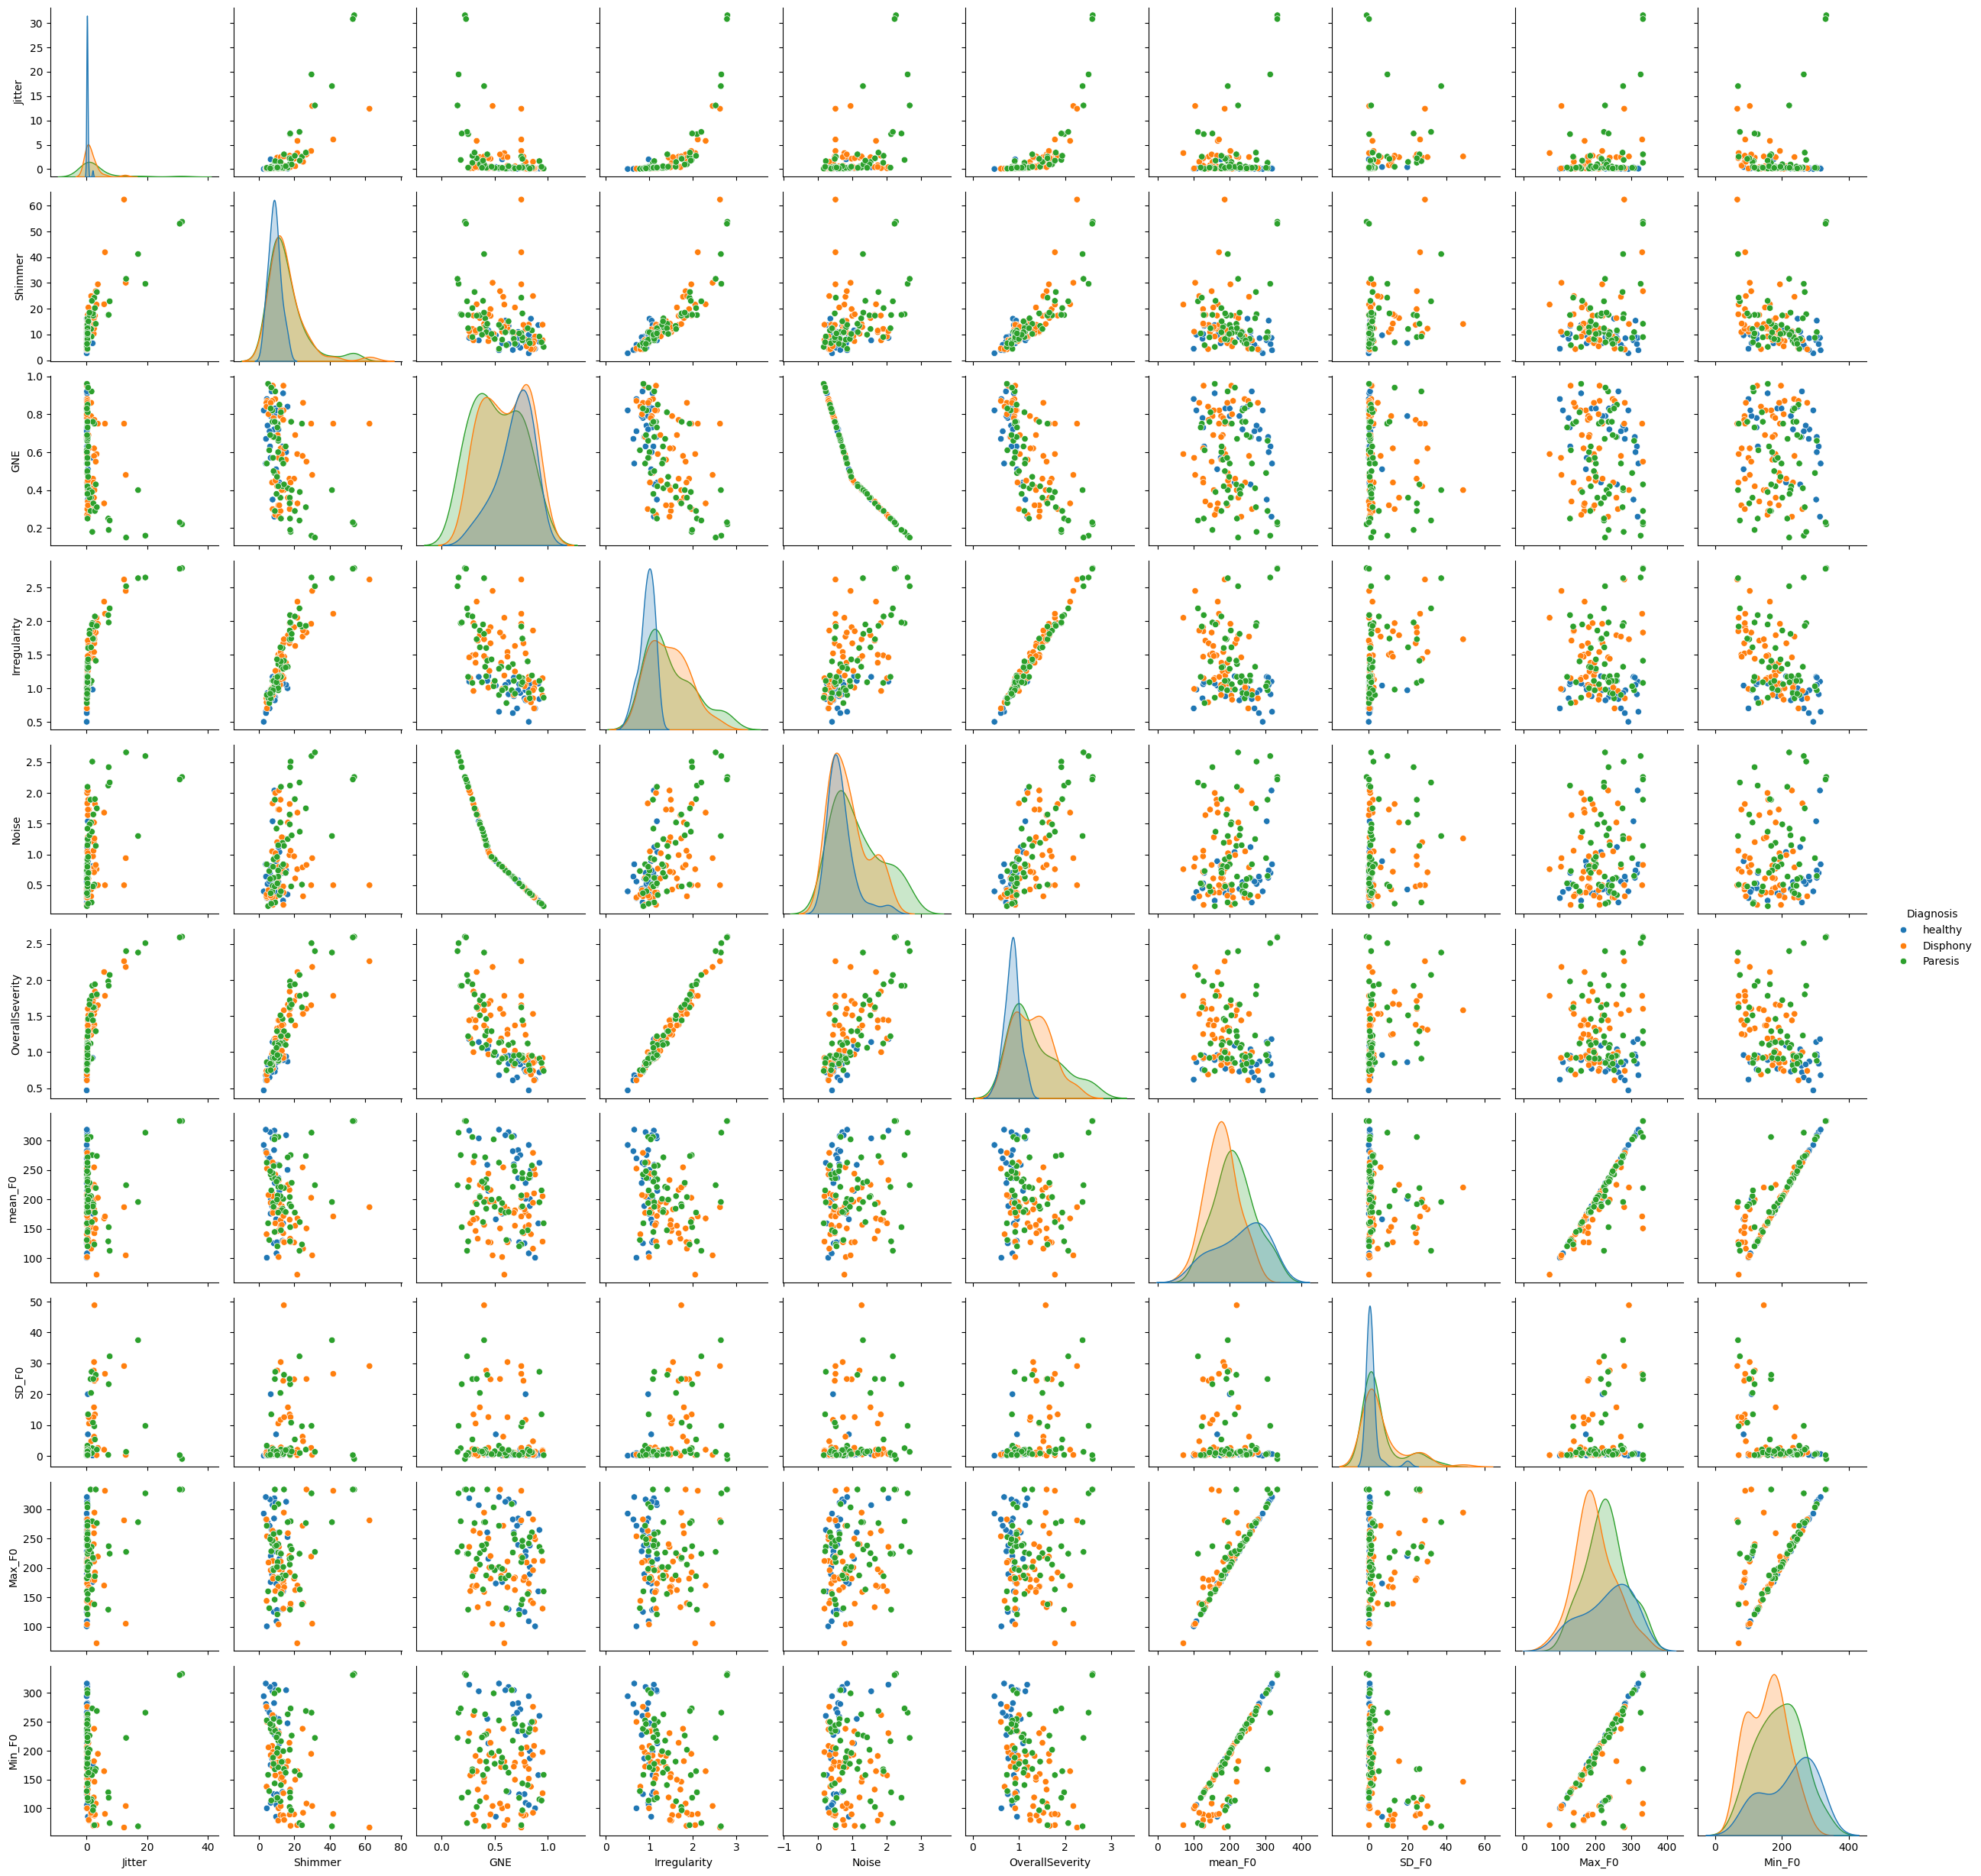

In [14]:
sns.pairplot(df, hue='Diagnosis');

* Interesting observation right off the bat is that the jitter for all the classes of Diagnosis is clustered at 0 when measured against other numeric features.
* Overall Severity Vs Irregularity for all classes have linear relationship.

#### 3. Correlation Matrix

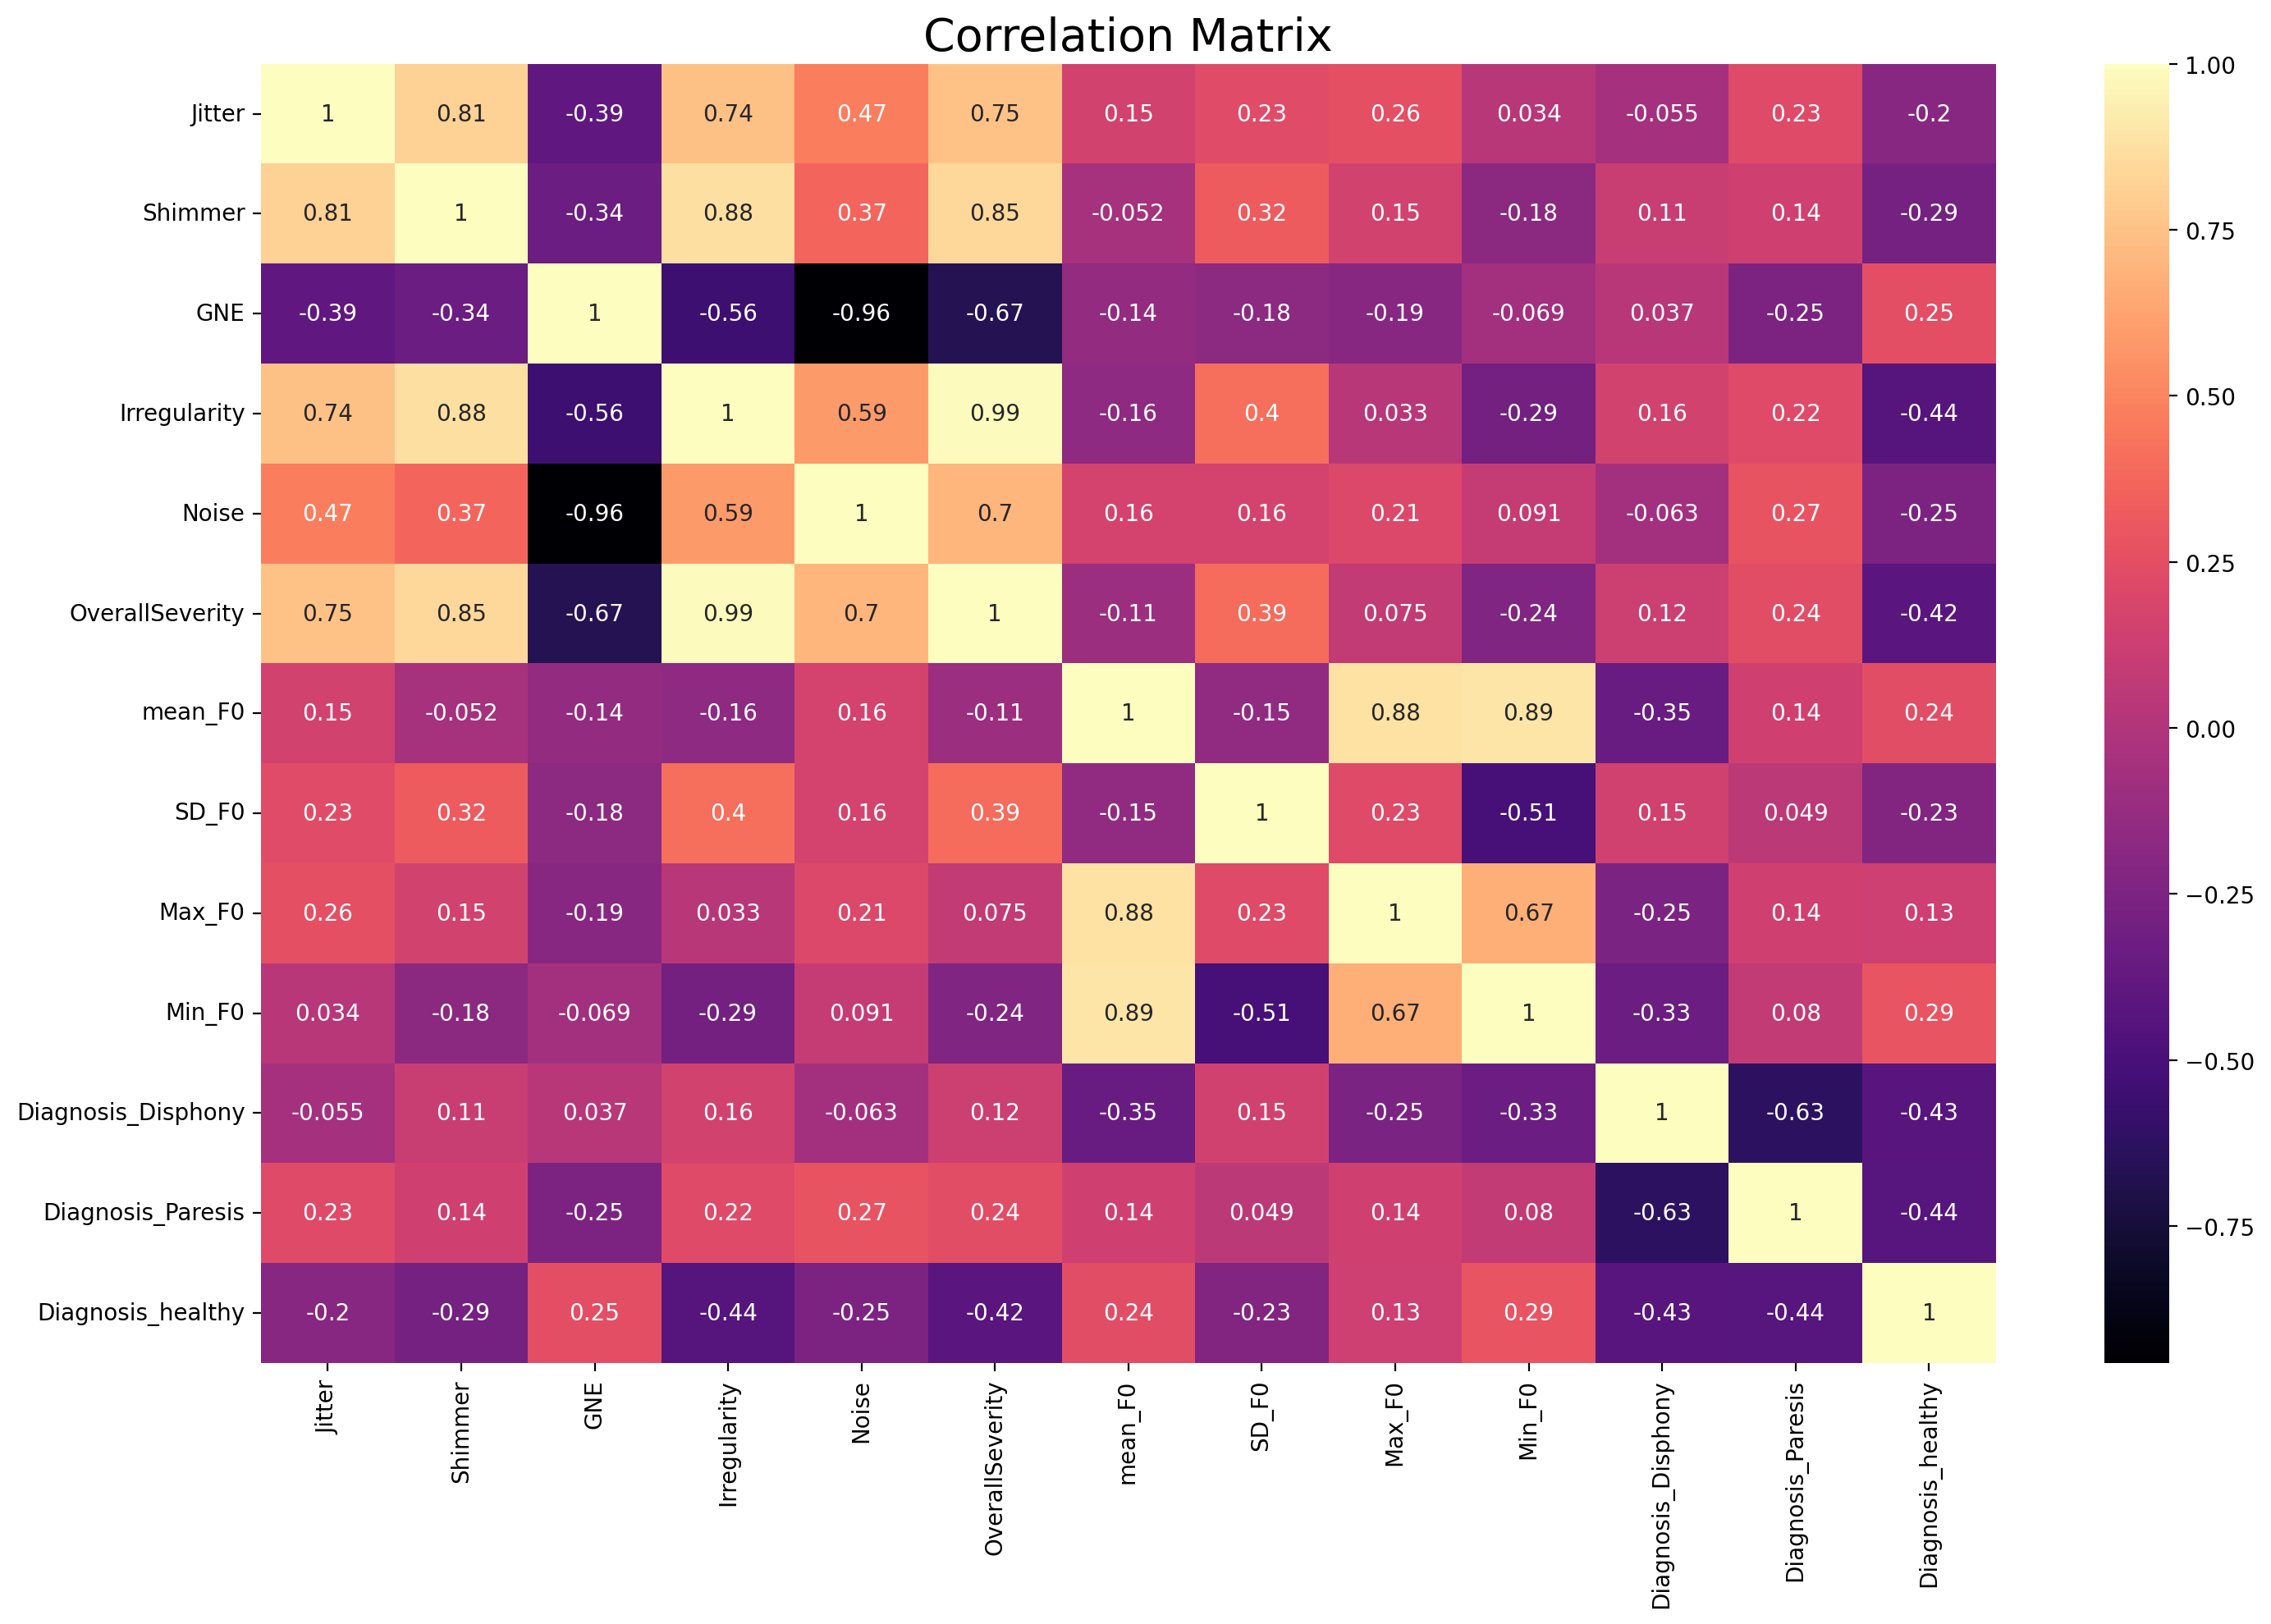

In [15]:
dummies = pd.get_dummies(df['Diagnosis'], dtype='int', sparse=True, prefix='Diagnosis')
corr_map = pd.concat((df, dummies), axis=1).corr(numeric_only=True)

plt.figure(figsize=(15, 10), dpi=200)
sns.heatmap(corr_map, cmap='magma', annot=True);
plt.title('Correlation Matrix', fontsize=20);
plt.tight_layout()

* It is clearly observed that Irregularity and OverallSeverity have high negative correlation(|r| > 0.9) which leads to multicollinearity.
* GNE and Noise have strong negative correlation
* Irregularity and OverallSeverity captured in the recordings have negative correlation with the patient diagnosed as healthy.


# Feature Selection

In [16]:
from sklearn.preprocessing import LabelEncoder
X = df.drop('Diagnosis', axis=1) #features
y = df['Diagnosis'] #target
y = LabelEncoder().fit_transform(y)


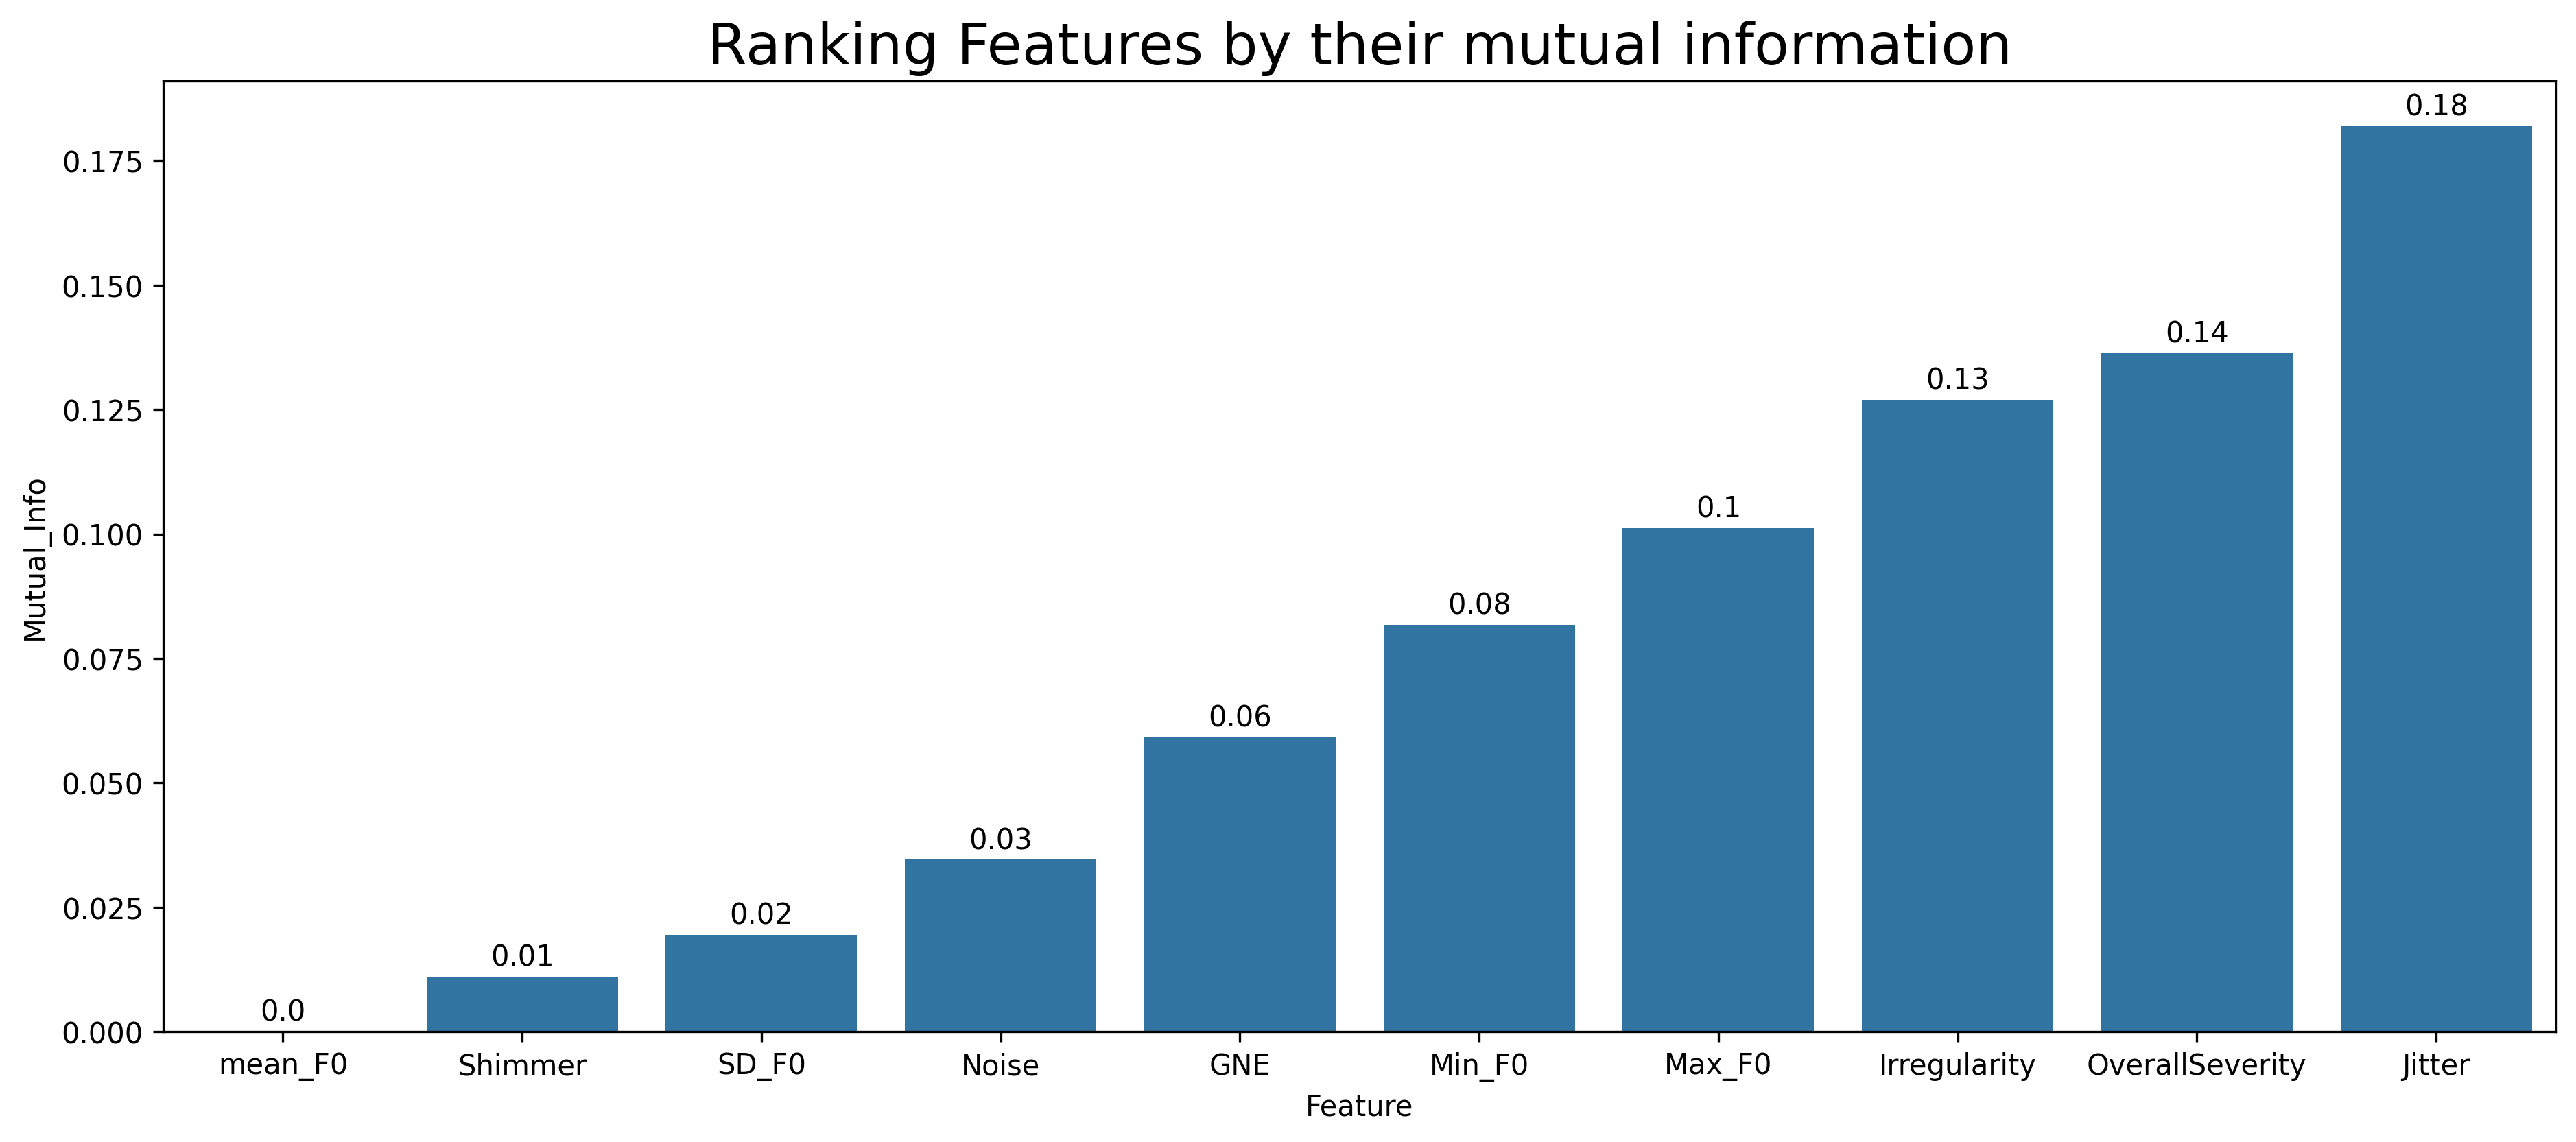

In [17]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(score_func=mutual_info_classif, k='all')
X_new = selector.fit_transform(X, y)
feature_scores = selector.scores_
feature_selection = pd.DataFrame({'Feature': X.columns, 'Mutual_Info': feature_scores})

plt.figure(figsize=(15, 6), dpi=300)
bars = sns.barplot(feature_selection.sort_values(by='Mutual_Info'), x='Feature', y='Mutual_Info');
for bar in bars.patches:
    bars.text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.001, round(bar.get_height(), 2), ha='center', va='bottom')

plt.title('Ranking Features by their mutual information', fontsize=20);


* If we set mutual_info = 0.02 as the threshold, we can drop **mean_F0, Shimmer, SD_F0, Noise** as they are contributing poorly in predicting the diagnosis of the subjects

In [18]:
X = X.drop(['mean_F0', 'Shimmer', 'SD_F0', 'Noise'], axis=1) #dropping redund

In [19]:
X

,Jitter,GNE,Irregularity,OverallSeverity,Max_F0,Min_F0
0,0.09,0.83,0.88,0.77,189.39,186.57
1,0.07,0.78,0.85,0.76,125.31,124.69
2,0.15,0.44,1.18,1.09,215.52,212.77
3,0.39,0.35,1.17,1.14,306.75,303.03
4,0.43,0.51,1.04,0.96,173.61,85.62
...,...,...,...,...,...,...
126,0.25,0.50,1.11,1.00,196.08,177.30
127,0.50,0.47,1.43,1.29,201.61,196.08
128,0.28,0.38,1.09,1.06,238.10,223.21
129,0.16,0.69,0.92,0.84,248.76,246.30


In [20]:
X.shape

(131, 6)

# Modelling

In [21]:
%pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [22]:
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [24]:
def evaluation_report(model, X_test, y_pred, y_test):
    print(classification_report(y_test, y_pred))
    print('f1_score: ', f1_score(y_test, y_pred, average='weighted'))
    print('roc_auc_score: ', roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=['Disphony', 'Paresis', 'Healthy'], cmap='RdPu_r')
    

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape, y_train.shape

((104, 6), (104,))

In [27]:
X_test.shape, y_test.shape

((27, 6), (27,))

### Feature Scaling

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 1. DecisionTreeClassifier

In [29]:
%pip install sklearn.utils._pprint


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.utils._pprint (from versions: none)
ERROR: No matching distribution found for sklearn.utils._pprint


In [30]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4],
    'ccp_alpha': [0, 0.01, 0.05],
    'class_weight': ['balanced', None]
}
grid_search_cv = GridSearchCV(estimator=dtc,
                             param_grid=params,
                             cv=5,
                             scoring='accuracy',
                             verbose=1)

grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0, 0.01, 0.05],
                         'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10], 'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy', verbose=1)

In [31]:
%pip install sklearn.utils._pprint


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.utils._pprint (from versions: none)
ERROR: No matching distribution found for sklearn.utils._pprint


In [32]:
grid_search_cv.best_params_

{'ccp_alpha': 0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [33]:
best_dtc = grid_search_cv.best_estimator_

best_dtc

DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=5,
                       min_samples_leaf=4)

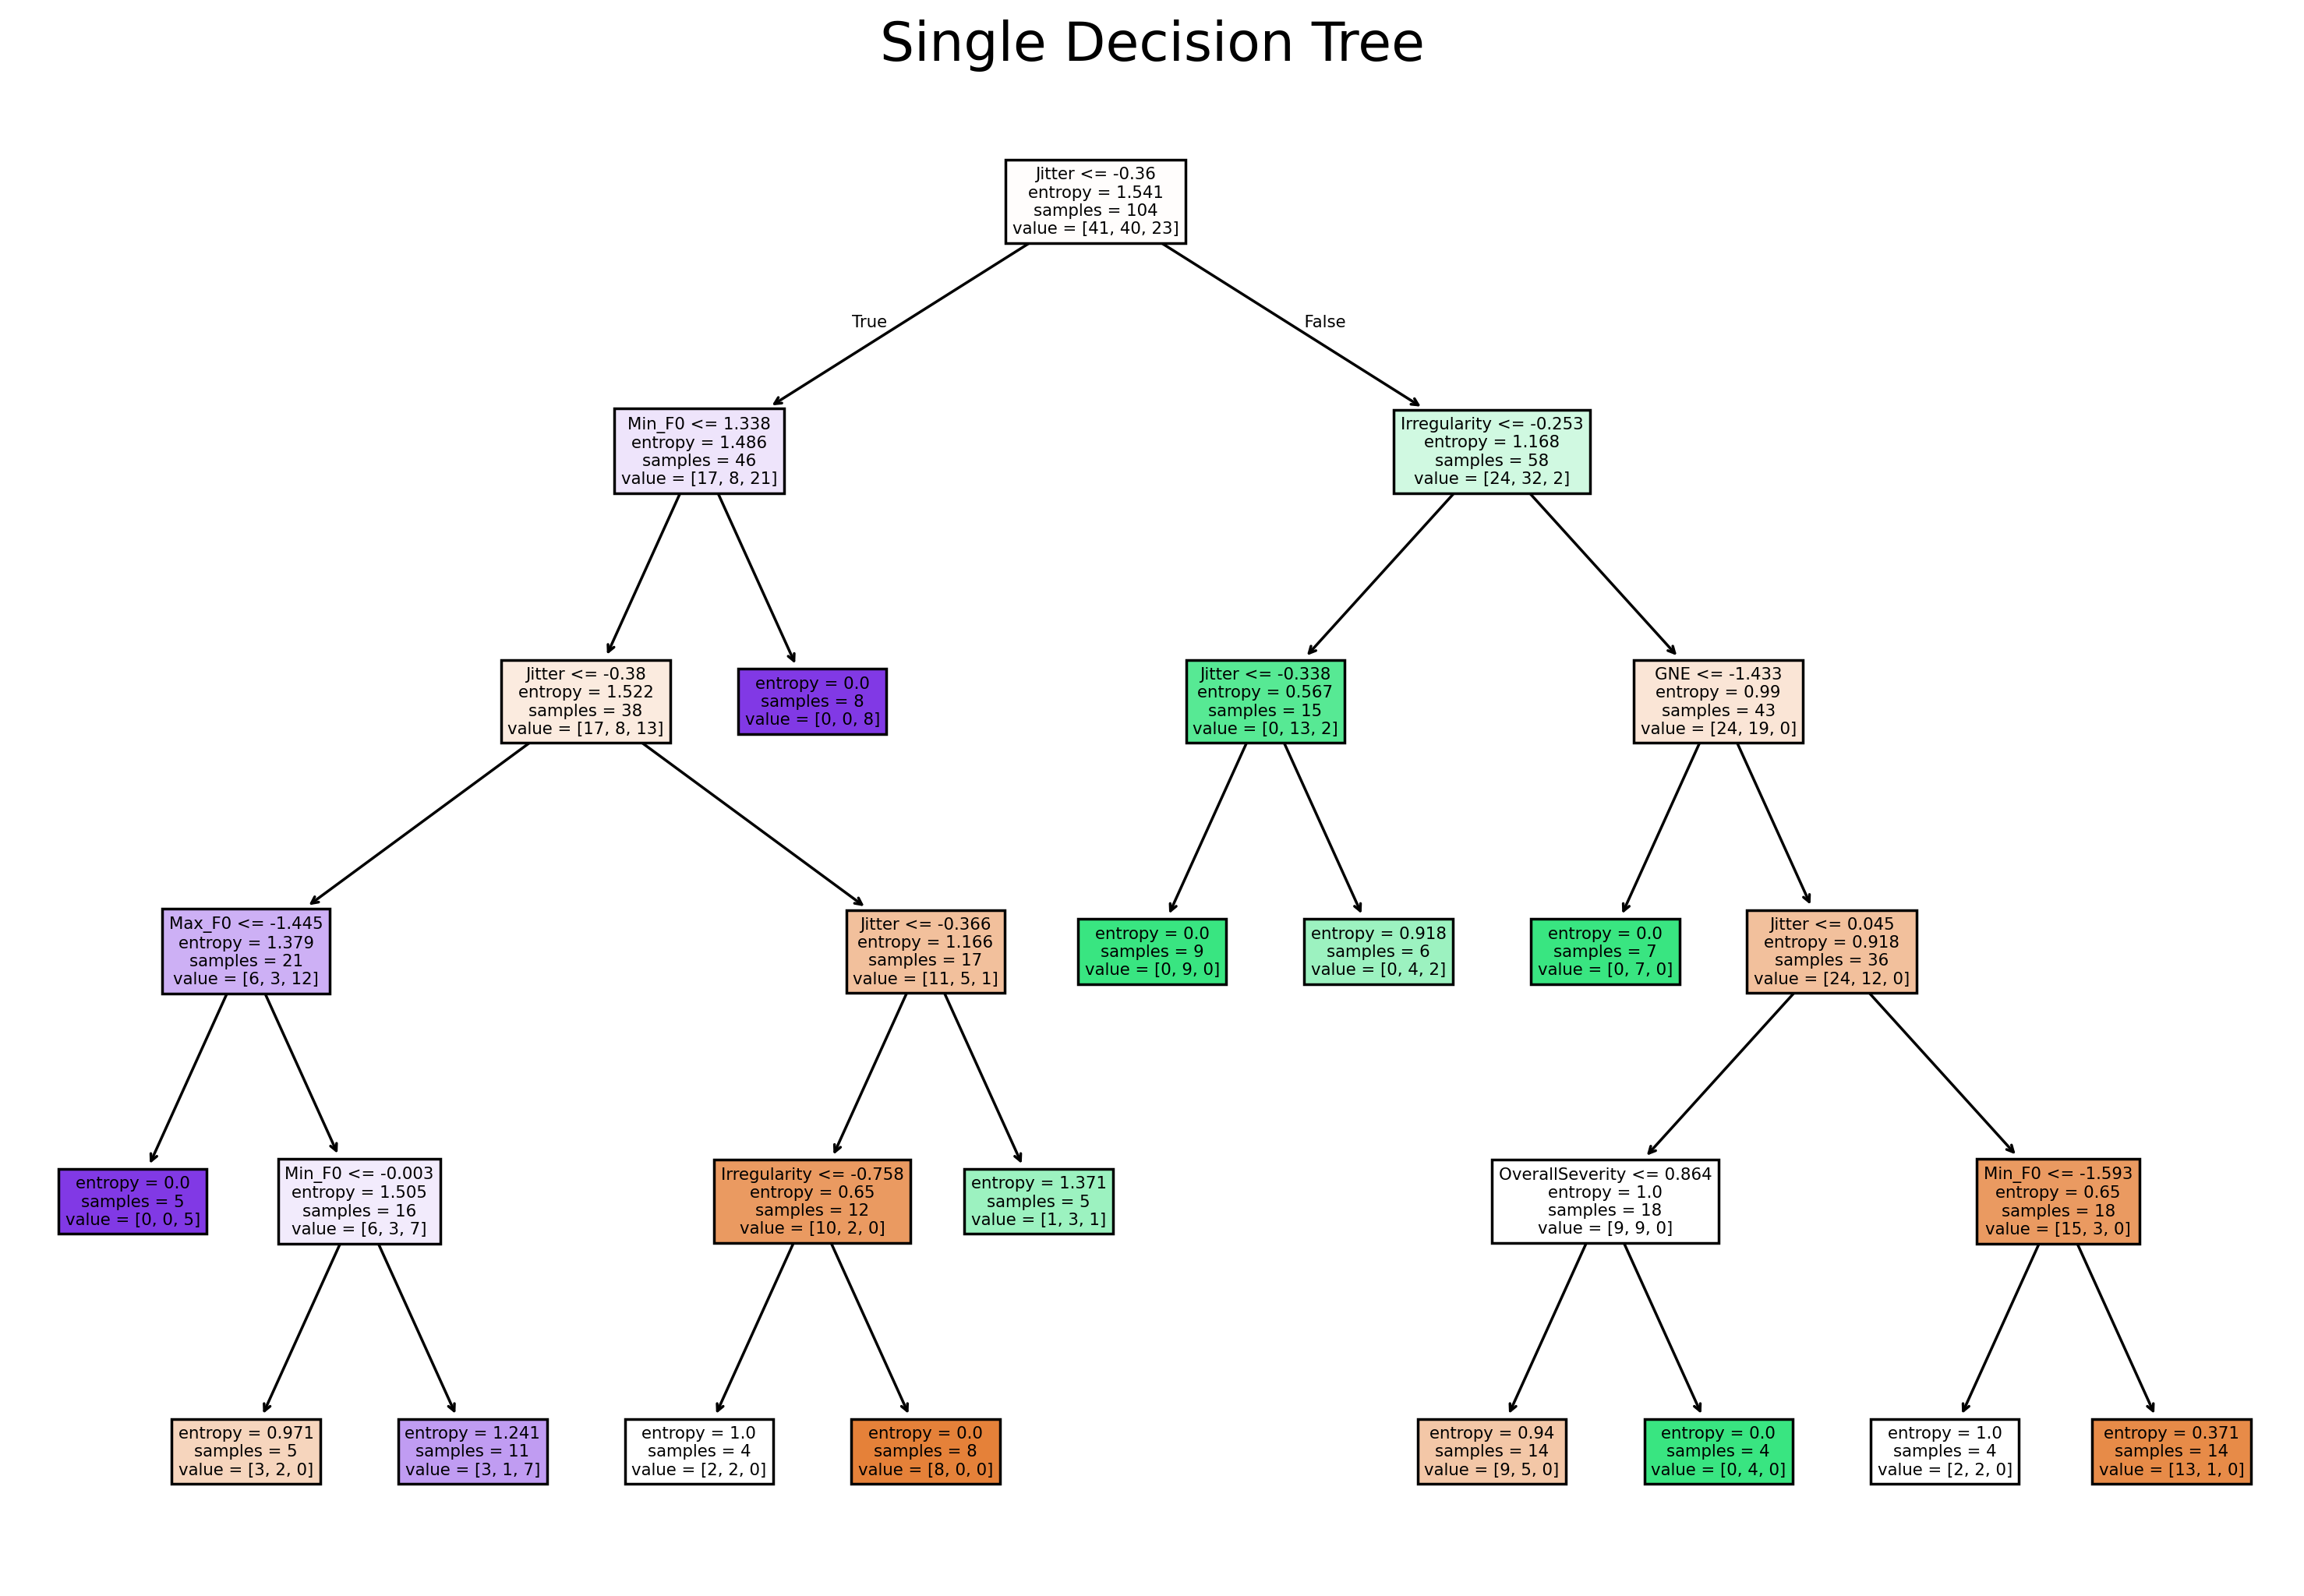

In [34]:
plt.figure(figsize=(15, 10), dpi=250)
plot_tree(best_dtc, feature_names=X.columns.to_list(), filled=True);
plt.title('Single Decision Tree', fontsize=20);

              precision    recall  f1-score   support

           0       0.42      0.56      0.48         9
           1       0.50      0.45      0.48        11
           2       0.60      0.43      0.50         7

    accuracy                           0.48        27
   macro avg       0.51      0.48      0.48        27
weighted avg       0.50      0.48      0.48        27

f1_score:  0.48236331569664903
roc_auc_score:  0.6281094676928011


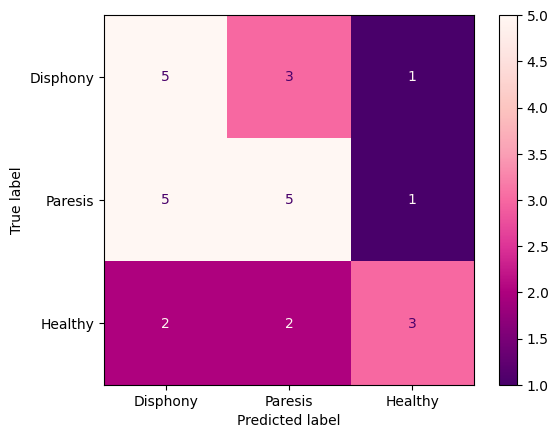

In [35]:
dtc_preds = best_dtc.predict(X_test)
evaluation_report(best_dtc, X_test, dtc_preds, y_test)

#### 2. RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
params={
    'n_estimators': [60, 80, 100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 5],
    'class_weight': ['balanced', None]
}

grid_search_cv = GridSearchCV(estimator=rfc,
                             param_grid=params,
                             cv=5,
                             scoring='accuracy',
                             verbose=1)

grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [4, 5], 'max_features': ['sqrt', 'log2'],
                         'n_estimators': [60, 80, 100]},
             scoring='accuracy', verbose=1)

In [37]:
grid_search_cv.best_params_

{'class_weight': None,
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 60}

In [38]:
best_rfc = grid_search_cv.best_estimator_
best_rfc

RandomForestClassifier(max_depth=5, n_estimators=60, random_state=42)

              precision    recall  f1-score   support

           0       0.55      0.67      0.60         9
           1       0.73      0.73      0.73        11
           2       0.40      0.29      0.33         7

    accuracy                           0.59        27
   macro avg       0.56      0.56      0.55        27
weighted avg       0.58      0.59      0.58        27

f1_score:  0.5827160493827159
roc_auc_score:  0.7488723210945434


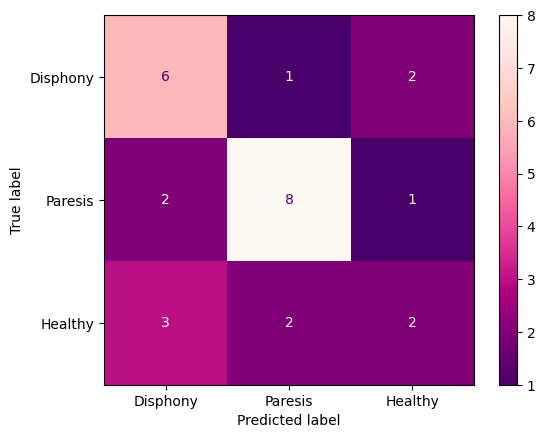

In [39]:
rfc_preds = rfc.predict(X_test)
evaluation_report(rfc, X_test, rfc_preds, y_test)

#### 3. XGBClassifier

In [40]:
xgb = XGBClassifier(objective='multiclass:softprob', num_class=3, eval_metric='mlogloss')

class_counts = np.bincount(y_train)  # Count occurrences of each class
total_samples = len(y_train)
class_weights = {i: total_samples / (len(class_counts) * count) for i, count in enumerate(class_counts)}

# Apply weights
sample_weights = np.array([class_weights[label] for label in y_train])


param_grid = {
    'n_estimators': [200, 350, 500],     
    'max_depth': [5],               
    'learning_rate': [0.01],    
    'gamma': [0.2, 0.3, 0.5]                
}

grid_search_cv = GridSearchCV(xgb, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.2, 0.3, 0.5], 'learning_rate': [0.01],
                         'max_depth': [5], 'n_estimators': [200, 350, 500]},
             verbose=1)

In [41]:
grid_search_cv.best_params_

{'gamma': 0.3, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}

In [42]:
xgb_optimized = XGBClassifier(objective='multiclass:sofprob', 
                              num_class=3, 
                              eval_metric='mlogloss',
                              n_estimators=200,
                              learning_rate=0.01,
                              max_depth=5,
                              gamma=0.2
                             )
xgb_optimized.fit(X_train, y_train, sample_weight=sample_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

              precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.80      0.73      0.76        11
           2       0.43      0.43      0.43         7

    accuracy                           0.59        27
   macro avg       0.58      0.57      0.57        27
weighted avg       0.60      0.59      0.60        27

f1_score:  0.5969553513413162
roc_auc_score:  0.7357530329752553


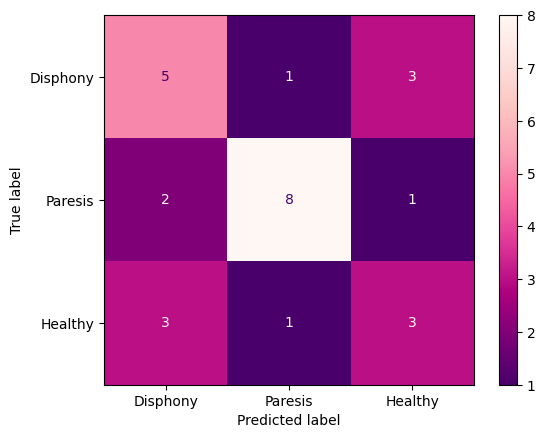

In [43]:
xgb_preds = xgb_optimized.predict(X_test)
evaluation_report(xgb_optimized, X_test, xgb_preds, y_test)

In [44]:
import pickle

# Save the trained model (XGBoost in this case)
with open("laryngeal-voice-disorder-classification.pkl", "wb") as f:
    pickle.dump(xgb_optimized, f)

print("Model saved successfully!")


Model saved successfully!


In [4]:
import xgboost as xgb

# Convert to XGBoost model (only if applicable)
xgb_model = xgb.XGBClassifier()
xgb_model._Booster = model  # Assign the booster

# Save in JSON format (recommended for XGBoost)
xgb_model.save_model("laryngeal-voice-disorder-classification-resaved.json")
print("XGBoost model successfully re-saved!")


XGBoost model successfully re-saved!
